In [1]:
# a. Import necessary packages
import tensorflow as tf
from tensorflow.keras import layers,models
from keras.utils import to_categorical
import numpy as np

In [2]:
# b. Load the training and testing data
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [4]:
# c. Define the network architecture using Keras
model=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
# d. Train the model using SGD/Adam optimizer
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2663 - loss: 2.0173 - val_accuracy: 0.3490 - val_loss: 1.7948
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3814 - loss: 1.7339 - val_accuracy: 0.4121 - val_loss: 1.6509
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4146 - loss: 1.6338 - val_accuracy: 0.4431 - val_loss: 1.5686
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4390 - loss: 1.5731 - val_accuracy: 0.4178 - val_loss: 1.6463
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4583 - loss: 1.5254 - val_accuracy: 0.4622 - val_loss: 1.5147
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4732 - loss: 1.4852 - val_accuracy: 0.4711 - val_loss: 1.4884
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4820 - loss: 1.4560 - val_accuracy: 0.4561 - val_loss: 1.4989
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4941 - loss: 1

In [7]:
# e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print('Test accuracy:',test_acc)
print('Test Loss:',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5011 - loss: 1.4015
Test accuracy: 0.4984000027179718
Test Loss: 1.4156609773635864


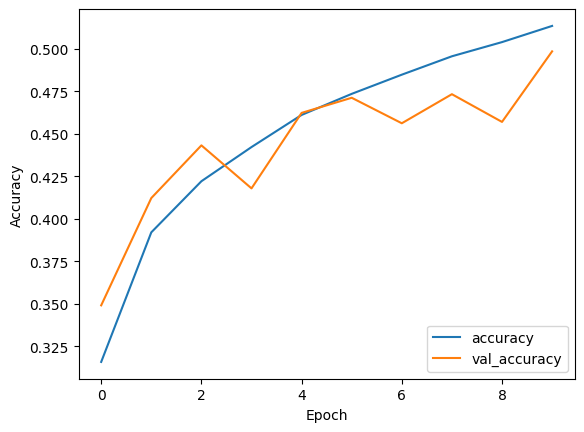

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

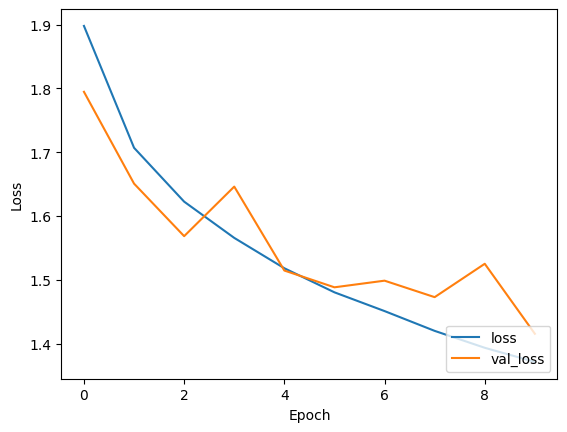

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

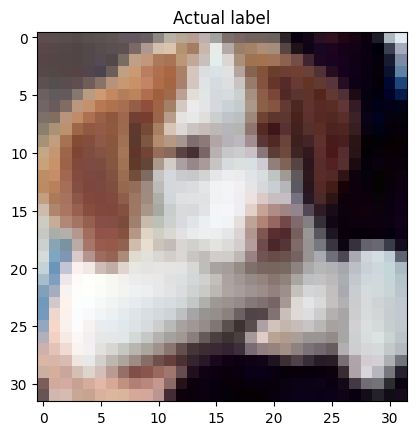

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Actual  dog
Predicted   dog


In [10]:
n = 16
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']  # Replace with your actual class names


plt.imshow(x_test[n])
plt.title("Actual label")
plt.show()

predicted = model.predict(x_test[n].reshape(1, 32, 32, 3))
actual_label = class_names[np.argmax(y_test[n])]  # Get actual class name
predicted_label = class_names[np.argmax(predicted)]  # Get predicted class name

print("Actual ", actual_label)  # Print actual class name
print("Predicted  ", predicted_label)